<a href="https://colab.research.google.com/github/Diequi/curso-series-temporales/blob/master/3.%20Caracter%C3%ADsticas%20fundamentales/Python/3_Trabajando_con_series_de_tiempo_en_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Relevant Packages

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading and Transforming the Data

In [7]:
raw_csv_data = pd.read_csv("/content/drive/MyDrive/CURSOS SERIES DE TIEMPO/Curso avanzado de Series Temporales con R y Python/Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')



### Removing Surplus Data

In [8]:
df_comp['market_value']=df_comp.spx

In [9]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [10]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [11]:
df['wn'] = wn

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1087.276353
std,292.559287,293.715893
min,438.920000,12.356818
25%,914.620000,888.391695
50%,1144.650000,1088.667469
75%,1316.280729,1289.431175
max,1570.252238,2111.269880


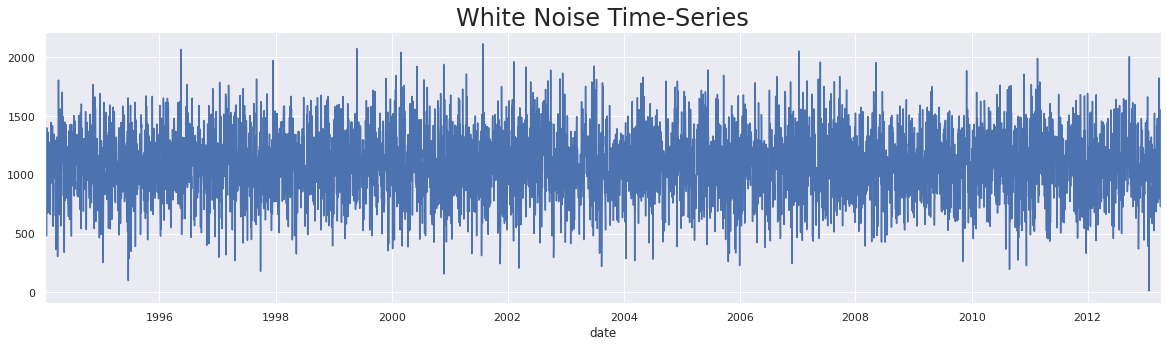

In [13]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

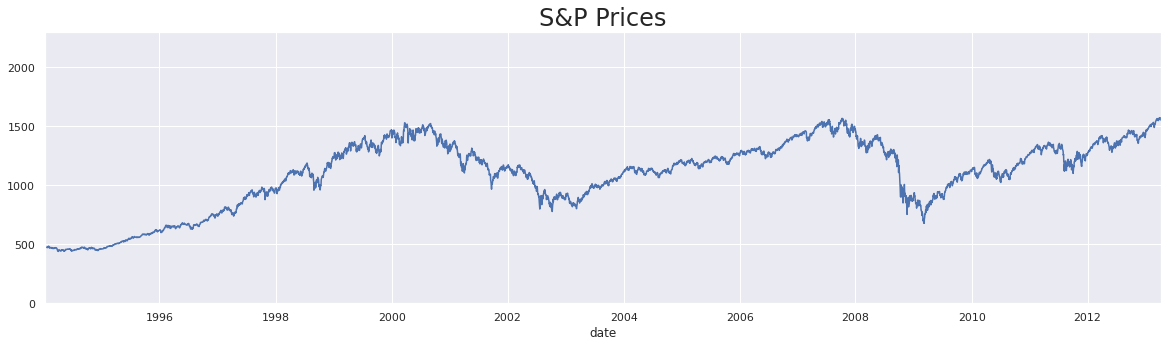

In [14]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

### Random Walk

In [15]:
rw = pd.read_csv("/content/drive/MyDrive/CURSOS SERIES DE TIEMPO/Curso avanzado de Series Temporales con R y Python/RandWalk.csv")


In [16]:
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [17]:
rw.date = pd.to_datetime(rw.date, dayfirst = True)


In [18]:
rw.set_index("date", inplace = True)


In [19]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831
1994-01-10,1080.347860
1994-01-11,1082.095245


In [20]:
rw = rw.asfreq('b')

In [21]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [22]:
df['rw'] = rw.price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1247.894939,1122.139662
1994-01-10,475.27,1697.605962,1080.347860
1994-01-11,474.13,1361.129937,1082.095245
1994-01-12,474.17,1111.904643,1083.639265
1994-01-13,472.47,1349.549652,1067.146255


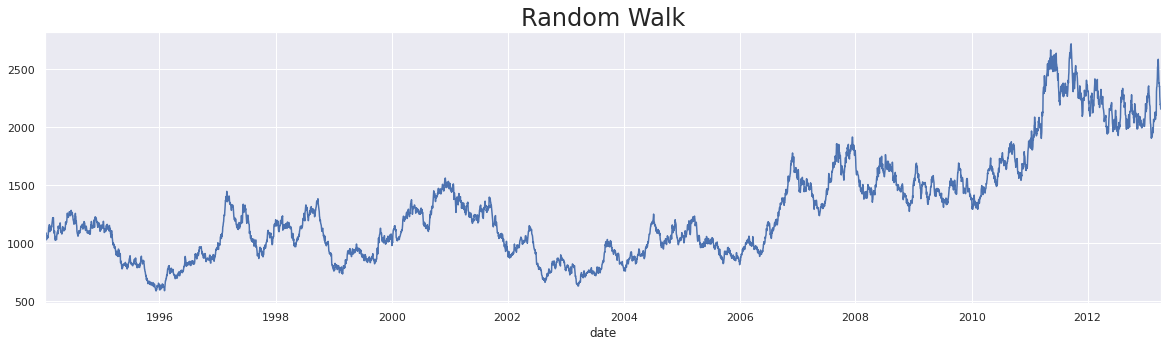

In [24]:
df.rw.plot(figsize = (20,5))
plt.title("Random Walk", size = 24)
plt.show()

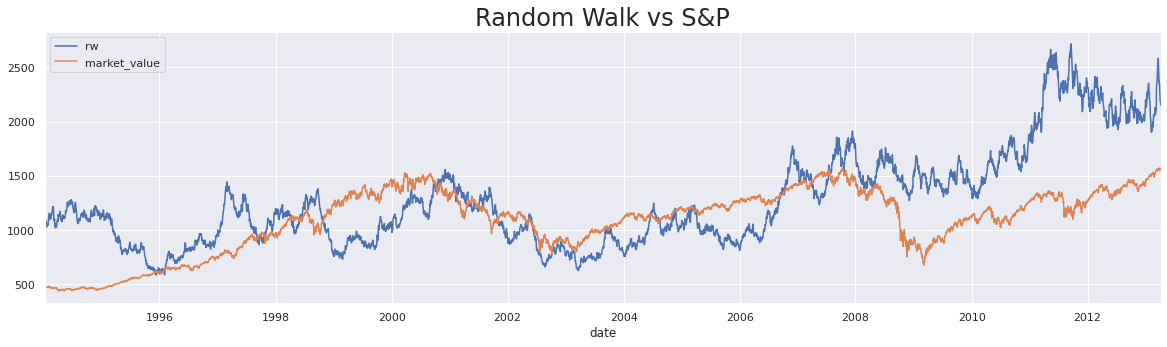

In [25]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.legend() 
plt.show()

### Stationarity

In [26]:
sts.adfuller(df.market_value)
#la funcioón que viene de sts, aplica el contraste de hipótesis para estacionariedad. H0 es que la serie no es estacionaria y como -1.7 es mayor a -3.4,es no se rechaza
  #0.4 valor p
  #18, hay autocorrelación con 18 retrasos

(-1.7369847452352454,
 0.4121645696770613,
 18,
 5002,
 {'1%': -3.431658008603046,
  '10%': -2.567077669247375,
  '5%': -2.862117998412982},
 39904.880607487445)

In [27]:
sts.adfuller(df.wn)

(-70.42563240595464,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '10%': -2.5670765656497516,
  '5%': -2.8621159253018247},
 70854.03636563153)

In [28]:
sts.adfuller(df.rw)


(-1.3286073927689719,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '10%': -2.567078038881065,
  '5%': -2.8621186927706463},
 46299.333497595144)

### Seasonality

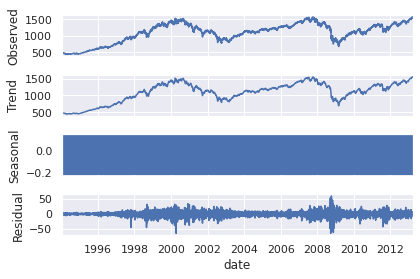

In [29]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive") #seasonal_decompose se usa para descomponer la serie
s_dec_additive.plot()
plt.show()

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


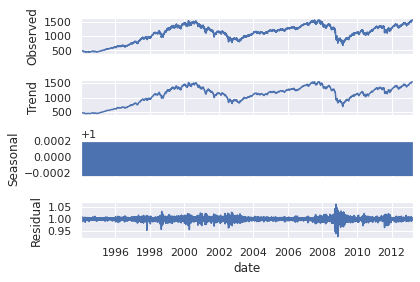

In [31]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

### ACF

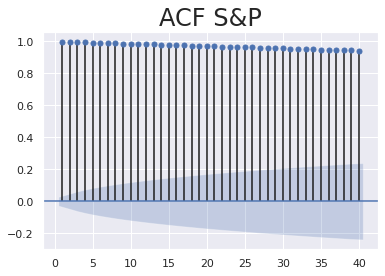

In [ ]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

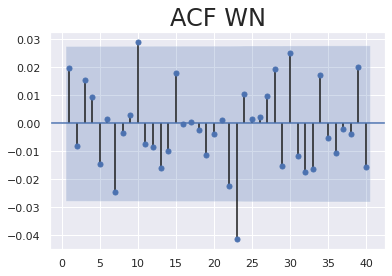

In [ ]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF WN", size = 24)
plt.show()

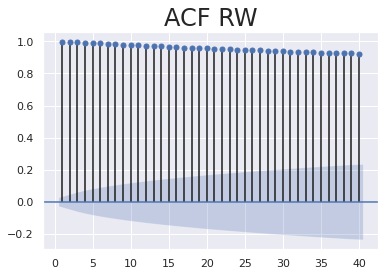

In [ ]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF RW", size = 24)
plt.show()

### PACF

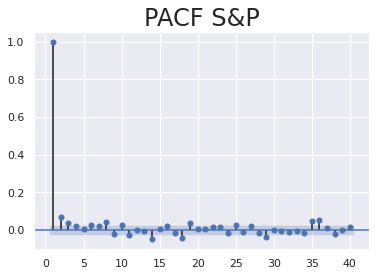

In [ ]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

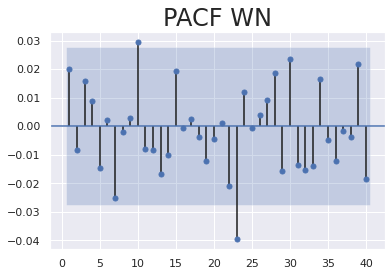

In [ ]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()

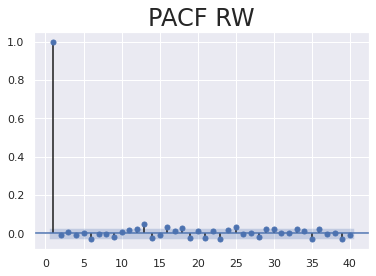

In [ ]:
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = ('ols'))
plt.title("PACF RW", size = 24)
plt.show()